In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

df = pd.read_csv('Cleaned_Nutrient_Dataset.csv')
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

df = df.dropna()
df_grouped = df.groupby('DATE').mean(numeric_only=True).reset_index()

df_grouped['Formatted_DATE'] = df_grouped['DATE'].dt.strftime('%m/%d/%Y')

df_grouped.head()

,DATE,POINT ID,PH,NA,NO3 and NO2,PO4,NH4,SO4,NH4.1,Formatted_DATE
0,1999-01-12,90240.0,8.56875,37.212500,1.270500,0.097625,0.234625,0.614463,0.013025,01/12/1999
1,1999-02-02,90240.0,8.95000,37.457143,0.546714,0.032143,0.036000,0.558486,0.002000,02/02/1999
2,1999-02-10,90240.0,8.84125,38.750000,0.529875,0.080125,0.218250,0.603675,0.012113,02/10/1999
3,1999-02-26,90240.0,9.02125,37.737500,0.281875,0.048875,0.269625,0.615625,0.014963,02/26/1999
4,1999-03-10,90240.0,8.91000,38.525000,0.326375,0.077250,0.478750,0.572975,0.026600,03/10/1999


In [3]:
forecast_dates = pd.date_range(start='01/01/2012', end='12/31/2021', freq='D')

forecast_results = {'DATE': forecast_dates}

In [8]:
from tqdm import tqdm
nutrient_cols = df_grouped.select_dtypes(include=[np.number]).columns.drop('DATE', errors='ignore')

forecast_results = {'DATE': forecast_dates}

for col in tqdm(nutrient_cols):
    print(f'Fitting ARIMA model for {col}...')
    series = df_grouped[col]

    # Skip if not enough unique points to model
    if series.nunique() < 5 or series.isnull().any():
        print(f" Skipping {col}: not enough data or contains NaNs")
        continue

    try:
        model = ARIMA(series, order=(5, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(forecast_dates))
        forecast_results[col] = forecast.values
    except Exception as e:
        print(f" Could not model {col}: {e}")
import warnings
warnings.filterwarnings("ignore")

 25%|████████████████████████▎                                                                        | 2/8 [00:00<00:00, 12.98it/s]

Fitting ARIMA model for POINT ID...
 Skipping POINT ID: not enough data or contains NaNs
Fitting ARIMA model for PH...
Fitting ARIMA model for NA...
Fitting ARIMA model for NO3 and NO2...


 50%|████████████████████████████████████████████████▌                                                | 4/8 [00:00<00:00,  7.00it/s]

Fitting ARIMA model for PO4...


 75%|████████████████████████████████████████████████████████████████████████▊                        | 6/8 [00:01<00:00,  4.99it/s]

Fitting ARIMA model for NH4...
Fitting ARIMA model for SO4...


 88%|████████████████████████████████████████████████████████████████████████████████████▉            | 7/8 [00:01<00:00,  5.10it/s]

Fitting ARIMA model for NH4.1...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.40it/s]


In [9]:
forecast_df = pd.DataFrame(forecast_results)
forecast_df['DATE'] = forecast_dates
forecast_df = forecast_df[['DATE'] + [col for col in forecast_df.columns if col != 'DATE']]
forecast_df.head()

,DATE,PH,NA,NO3 and NO2,PO4,NH4,SO4,NH4.1
0,2012-01-01,7.990128,49.738498,2.832344,0.060930,-2009.971621,0.571818,-2011.945142
1,2012-01-02,7.949181,49.990772,2.196176,0.068569,-2049.933464,0.569788,-2049.379688
2,2012-01-03,7.987803,50.129525,2.789544,0.073513,-1940.215551,0.561498,-1937.876245
3,2012-01-04,7.972564,49.851847,2.404507,0.083481,-4230.880442,0.568060,-4232.825034
4,2012-01-05,7.942349,49.987908,2.505686,0.096279,-923.051312,0.563094,-923.750079


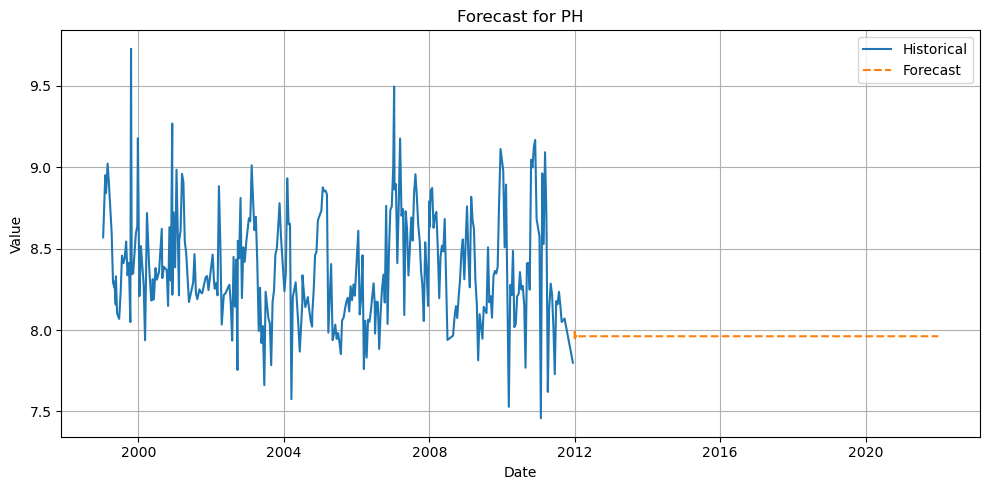

In [10]:
import matplotlib.pyplot as plt

nutrient_to_plot = 'PH' 
plt.figure(figsize=(10,5))
plt.plot(df_grouped['DATE'], df_grouped[nutrient_to_plot], label='Historical')
plt.plot(forecast_df['DATE'], forecast_df[nutrient_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast for {nutrient_to_plot}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

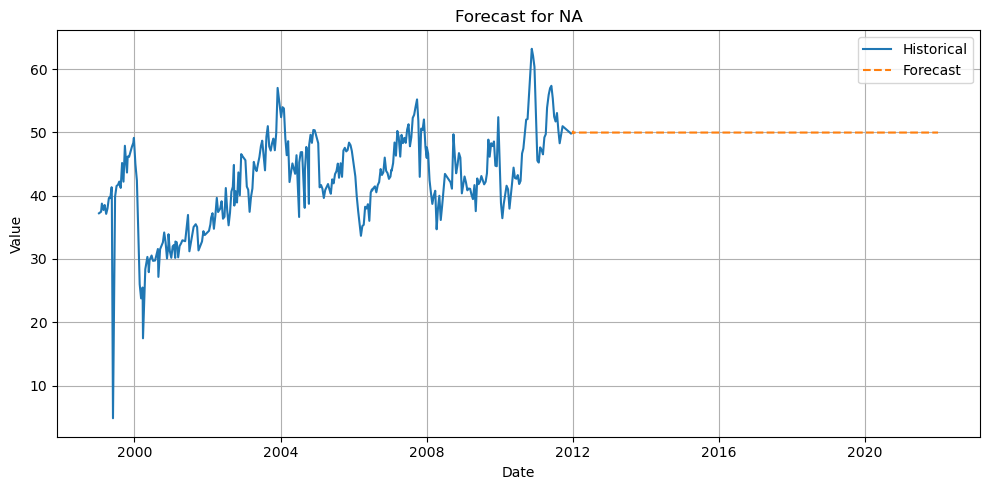

In [11]:
import matplotlib.pyplot as plt

nutrient_to_plot = 'NA' 
plt.figure(figsize=(10,5))
plt.plot(df_grouped['DATE'], df_grouped[nutrient_to_plot], label='Historical')
plt.plot(forecast_df['DATE'], forecast_df[nutrient_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast for {nutrient_to_plot}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

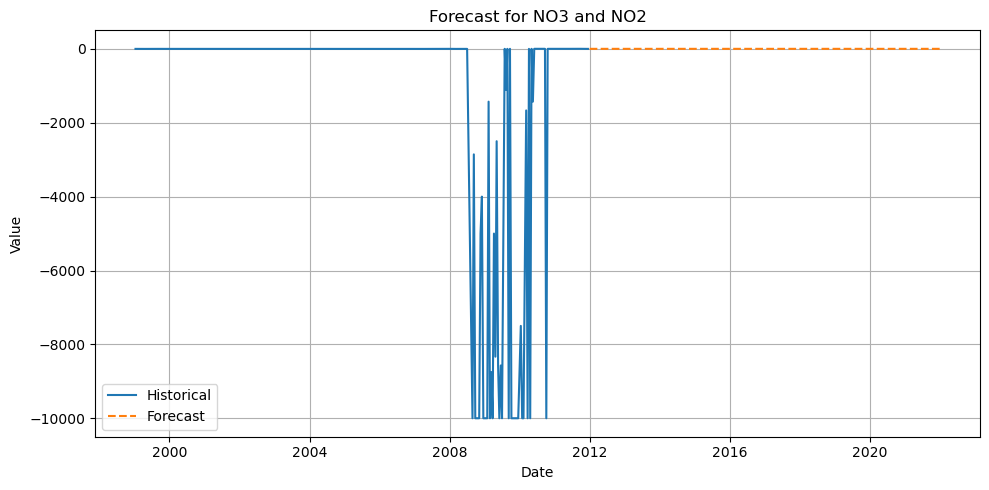

In [12]:
import matplotlib.pyplot as plt

nutrient_to_plot = 'NO3 and NO2' 
plt.figure(figsize=(10,5))
plt.plot(df_grouped['DATE'], df_grouped[nutrient_to_plot], label='Historical')
plt.plot(forecast_df['DATE'], forecast_df[nutrient_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast for {nutrient_to_plot}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

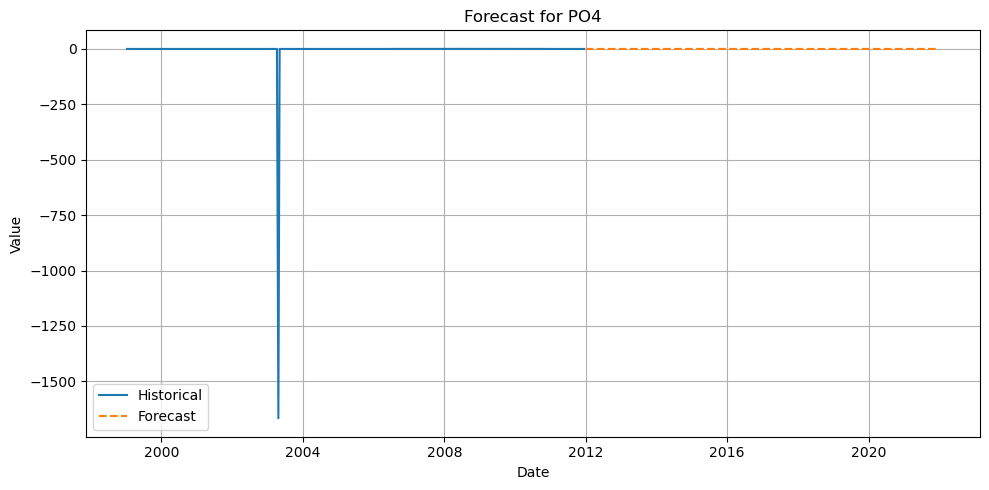

In [13]:
import matplotlib.pyplot as plt

nutrient_to_plot = 'PO4' 
plt.figure(figsize=(10,5))
plt.plot(df_grouped['DATE'], df_grouped[nutrient_to_plot], label='Historical')
plt.plot(forecast_df['DATE'], forecast_df[nutrient_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast for {nutrient_to_plot}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

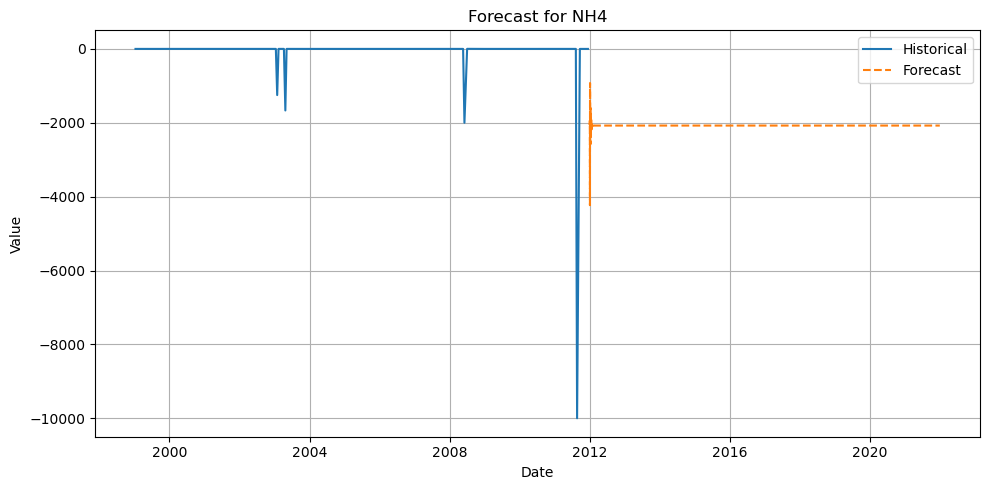

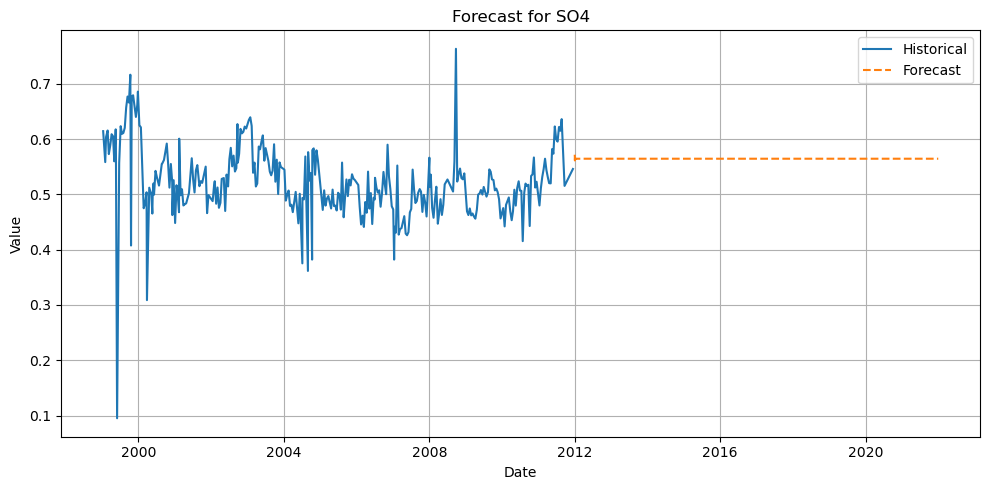

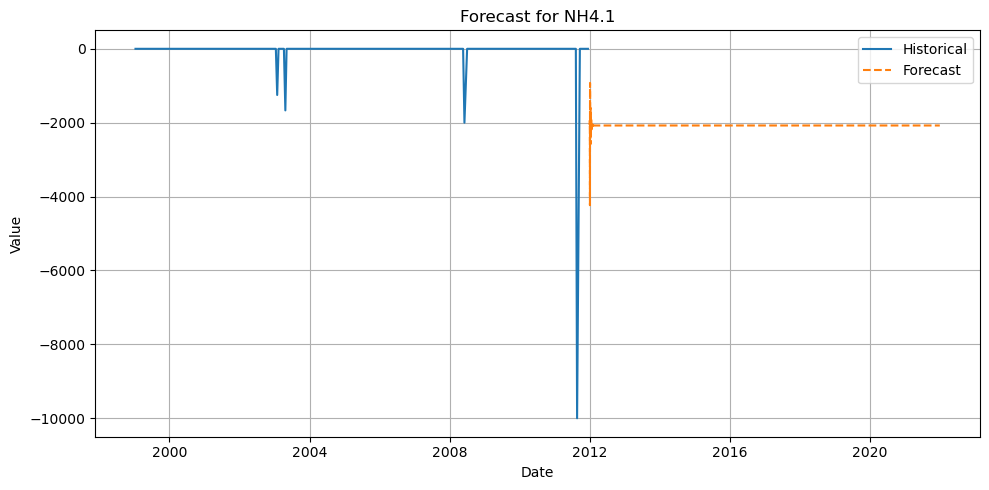

In [15]:
import matplotlib.pyplot as plt

nutrient_to_plot = 'NH4' 
plt.figure(figsize=(10,5))
plt.plot(df_grouped['DATE'], df_grouped[nutrient_to_plot], label='Historical')
plt.plot(forecast_df['DATE'], forecast_df[nutrient_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast for {nutrient_to_plot}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

nutrient_to_plot = 'SO4' 
plt.figure(figsize=(10,5))
plt.plot(df_grouped['DATE'], df_grouped[nutrient_to_plot], label='Historical')
plt.plot(forecast_df['DATE'], forecast_df[nutrient_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast for {nutrient_to_plot}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt

nutrient_to_plot = 'NH4.1' 
plt.figure(figsize=(10,5))
plt.plot(df_grouped['DATE'], df_grouped[nutrient_to_plot], label='Historical')
plt.plot(forecast_df['DATE'], forecast_df[nutrient_to_plot], label='Forecast', linestyle='--')
plt.title(f'Forecast for {nutrient_to_plot}')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
forecast_df.to_csv('Forecasted_Nutrient_Data(2012-2021).csv', index=False)
print("Pass!")

Pass!
